In [ ]:
!pip install -q --upgrade selectivesearch torch_snippets
from torch_snippets import *
import selectivesearch
from google.colab import files

In [ ]:
! pip install kaggle # Установить библиотеку Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kostyasereginmailru","key":"ad05ad97cdde449caa2e57874c5b2819"}'}

In [ ]:
! mkdir ~/.kaggle # Создать каталог с именем “.kaggle”

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/ # Скопировать файл “kaggle.json” в созданный каталог

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json # Назначить необходимое разрешение для этого файла

In [ ]:
! kaggle datasets download arjunbasandrai/25-indian-bird-species-with-226k-images # ! kaggle datasets download <name-of-dataset>
# Здесь “name of the dataset” — это “user-name/dataset-name” (“имя пользователя/имя набора данных”). Вам нужно просто скопировать текст после “www.kaggle.com/"

100% 4.06G/4.07G [00:32<00:00, 163MB/s]
100% 4.07G/4.07G [00:32<00:00, 134MB/s]


In [ ]:
! unzip /content/25-indian-bird-species-with-226k-images.zip



---



# **НАЧАЛО**

In [ ]:
import pandas as pd
import os
from glob import glob

In [ ]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

In [ ]:
!pip install -q --upgrade selectivesearch torch_snippets
from torch_snippets import *
import selectivesearch
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download gpiosenka/cats-in-the-wild-image-classification

100% 123M/123M [00:04<00:00, 36.3MB/s]
100% 123M/123M [00:04<00:00, 26.4MB/s]


In [ ]:
! unzip /content/cats-in-the-wild-image-classification.zip



---



In [ ]:
read('/content/train/CARACAL/002.jpg',1).shape

(224, 224, 3)

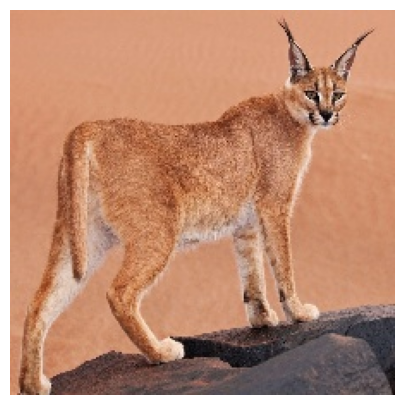

In [ ]:
show(read('/content/train/CARACAL/013.jpg',1),sz=5)

In [ ]:
train_data_dir = '/content/train'
test_data_dir = '/content/test'

In [ ]:
classes = []
for name in Glob('/content/train/*'):
    i = str(name).split('/')
    classes.append(i[-1])
print(classes)

In [ ]:
dct = {i:j for i,j in enumerate(classes)}
dct

{0: 'CLOUDED LEOPARD',
 1: 'CHEETAH',
 2: 'PUMA',
 3: 'JAGUAR',
 4: 'CARACAL',
 5: 'TIGER',
 6: 'OCELOT',
 7: 'SNOW LEOPARD',
 8: 'LIONS',
 9: 'AFRICAN LEOPARD'}

In [ ]:
dct = {v: k for k, v in dct.items()}
dct

{'CLOUDED LEOPARD': 0,
 'CHEETAH': 1,
 'PUMA': 2,
 'JAGUAR': 3,
 'CARACAL': 4,
 'TIGER': 5,
 'OCELOT': 6,
 'SNOW LEOPARD': 7,
 'LIONS': 8,
 'AFRICAN LEOPARD': 9}

In [ ]:
class WildCats(Dataset):
    def __init__(self, folder):
        all = Glob(folder + '/*/*.jpg')
        self.fpaths = all
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = [dct[str(i).split('/')[-2]] for i in self.fpaths]
    def __len__(self): return len(self.targets)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = read(f,1)
#        im = resize(im, (224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im)
        return im.float().to(device), torch.tensor([target]).float().to(device)

In [ ]:
data = WildCats(test_data_dir)

tensor[3, 224, 224] n=150528 (0.6Mb) x∈[-2.118, 2.113] μ=-1.025 σ=0.695 tensor[1] [4.000]

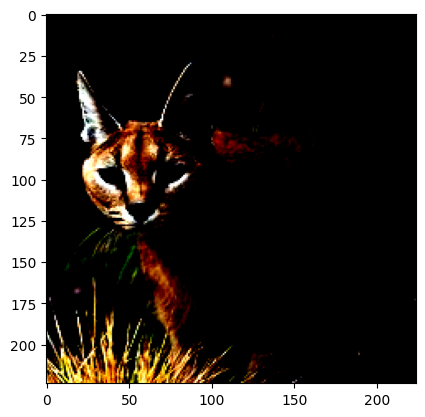

In [ ]:
im, label = data[13]
plt.imshow(im.permute(1,2,0).cpu())
print(im, label)

In [ ]:
def get_model():
    model = models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.classifier = nn.Sequential(nn.Flatten(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 10))
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model.to(device), loss_fn, optimizer

In [ ]:
!pip install torch_summary
from torchsummary import summary
model, loss_fn, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 232MB/s]


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,



---



# **по-новому**

In [ ]:
def compute_metrics(preds, targets):
    loss = loss_fn(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return loss, acc

In [ ]:
def train_batch(x, y, model, opt):
    model.train()
    _preds = model(x)
    loss, acc = compute_metrics(_preds, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item(), acc.item()

In [ ]:
@torch.no_grad()
def validate_batch(x, y, model):
    model.eval()
    _preds = model(x)
    loss, acc = compute_metrics(_preds, y)
    return loss.item(), acc.item()



---



# **по-старому**

In [ ]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [ ]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()



---



In [ ]:
def get_data():
    train = WildCats(train_data_dir)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = WildCats(test_data_dir)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

In [ ]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()



---



# **по-новому**

In [ ]:
log = Report(3)
for epoch in range(3):
    N = len(trn_dl)
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        loss, acc = train_batch(x, torch.flatten(y).type(torch.LongTensor), model, optimizer)
        log.record(epoch+(ix+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        loss, acc = validate_batch(x, torch.flatten(y).type(torch.LongTensor), model)
        log.record(epoch+(ix+1)/N, val_loss=loss, val_acc=acc, end='\r')

EPOCH: 3.000  val_loss: 0.115  val_acc: 1.000  (9248.79s - 0.00s remaining)

100%|██████████| 104/104 [00:00<00:00, 8627.52it/s]


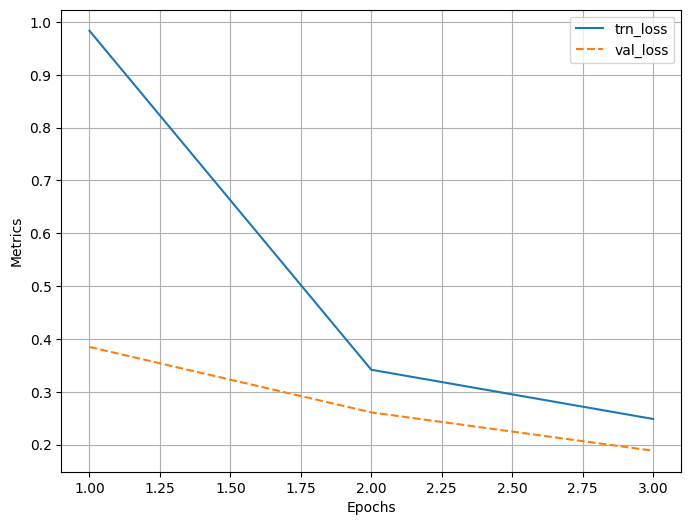

In [ ]:
log.plot_epochs(['trn_loss','val_loss'])

100%|██████████| 104/104 [00:00<00:00, 4766.15it/s]


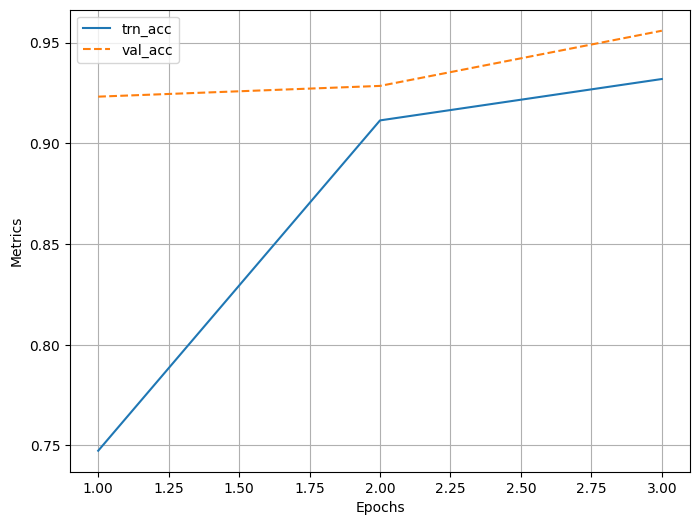

In [ ]:
log.plot_epochs(['trn_acc','val_acc'])



---



### Saving

In [ ]:
save_path = 'cats_model.pth'
torch.save(model.state_dict(), save_path)
!du -hsc {save_path} # size of the model on disk

57M	cats_model.pth
57M	total


### Loading

In [ ]:
load_path = 'cats_model.pth'
model.load_state_dict(torch.load(load_path))

NameError: ignored



---



### Predictions

In [ ]:
val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()

In [ ]:
model(val.to(device))

tensor([[16.5265],
        [20.2101],
        [ 4.5547]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
val.sum(-1)

tensor([17., 21.,  4.])